# PLANTILLA MODELIZACIÓN PARA CLASIFICACIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## MODELIZAMOS PD

### IMPORTAMOS LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = r'C:\Users\mcent\OneDrive\Escritorio\PROYECTOS ML\SCORING_DE_RIESGOS'

Nombre del fichero

In [3]:
nombre_fichero = 'df_pd'

Cargar los datos.

In [4]:
df_pd = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero)

In [5]:
target = 'pd'

In [6]:
y_pd = df_pd[target]
x_pd = df_pd.drop(columns=target)

### MODELIZAR

#### Reservamos el dataset de validacion

In [9]:
train_x,val_x,train_y,val_y = train_test_split(x_pd,y_pd,test_size=0.3)

#### Creamos el pipe y el diccionario de algoritmos, parámetros y valores a testar

In [10]:
pipe = Pipeline([('algoritmo',LogisticRegression())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]}]

#### Optimizar los hiper parámetros con grid search

In [11]:
grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = 'roc_auc',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,4.47,0.15,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",1,-1,l2,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,1
15,1.99,0.32,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",0.75,-1,none,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,2
7,2.05,0.32,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",0.25,-1,none,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,3
19,1.76,0.18,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",1,-1,none,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,4
11,2.28,0.16,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",0.50,-1,none,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,5
3,2.06,0.49,0.04,0.01,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",0,-1,none,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,6
14,4.84,0.14,0.03,0.00,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",0.75,-1,l2,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,7
10,3.91,0.12,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",0.50,-1,l2,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,8
17,1.88,0.18,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",1,-1,l1,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,9
13,2.01,0.09,0.02,0.00,"LogisticRegression(C=1, n_jobs=-1, solver='saga')",0.75,-1,l1,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.71,0.70,0.70,0.70,0.00,10


### EVALUAR

#### Predecir sobre validación

In [12]:
pred_pd = modelo.best_estimator_.predict_proba(val_x)[:, 1]

#### Evaluar sobre validación

In [13]:
roc_auc_score(val_y, pred_pd)

0.7009954681856941

#### Examinar el mejor modelo

In [14]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=1, n_jobs=-1, solver='saga'))])

**Reentrenamos el modelo con la mejor configuración**

In [15]:
rl = LogisticRegression(C=1, n_jobs=-1, penalty='l2', solver='saga')

In [16]:
rl.fit(train_x,train_y)

LogisticRegression(C=1, n_jobs=-1, solver='saga')

In [17]:
pred = rl.predict(val_x)

In [20]:
check_validacion = pd.DataFrame({'pd_real':val_y, 'pd_pred':pred})
check_validacion.head(40)

,pd_real,pd_pred
id_cliente,,
130060563,0,0
75315561,0,0
36350164,0,0
69853415,0,0
72605128,1,0
129858646,0,0
124810006,0,0
4434887,0,0
75182377,0,0


In [21]:
coeficientes = pd.DataFrame(data = rl.coef_, columns= rl.feature_names_in_).stack().droplevel(level= 0).sort_values()

**Chequeamos coeficientes donde vemos que el Lasso lleva algunos a 0, podríamos volver a crear modelo y excluir estas variables**

In [23]:
coeficientes

rating_oe_mms                          -4.65
tipo_interes_mms                       -2.40
ingresos_mms                           -0.90
principal_mms                          -0.81
num_hipotecas_mms                      -0.22
ingresos_verificados_Not Verified      -0.18
vivienda_MORTGAGE                      -0.14
finalidad_car                          -0.13
finalidad_vacation                     -0.10
num_cuotas_ 36 months                  -0.09
finalidad_other                        -0.09
finalidad_moving                       -0.06
finalidad_credit_card                  -0.02
finalidad_medical                      -0.01
antiguedad_empleo_oe_mms                0.00
vivienda_OWN                            0.01
ingresos_verificados_Source Verified    0.06
finalidad_debt_consolidation            0.07
dti_mms                                 0.08
finalidad_small_business                0.10
porc_tarjetas_75p_mms                   0.10
num_cuotas_ 60 months                   0.10
finalidad_

### REPORTING DEL MODELO

In [24]:
roc_auc_score(val_y, pred_pd)

0.7009954681856941

**Consideramos que un 70% es aceptable y es útil el modelo**

#### ROC Chart

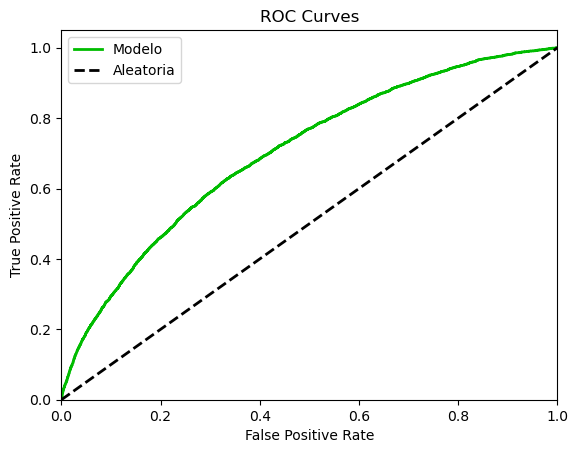

In [25]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, rl.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
plt.legend(labels = ['Modelo','Aleatoria']);

### Gain Chart

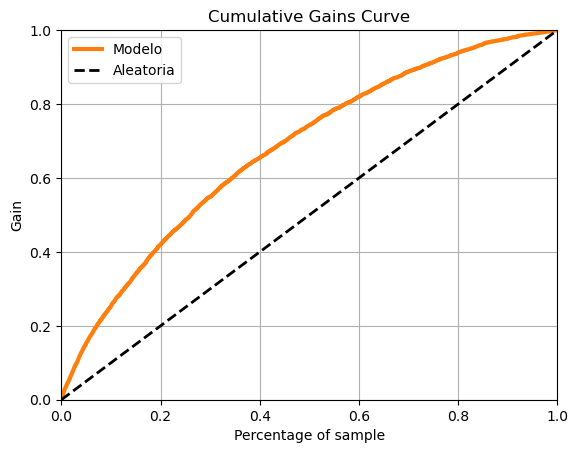

In [26]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, rl.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

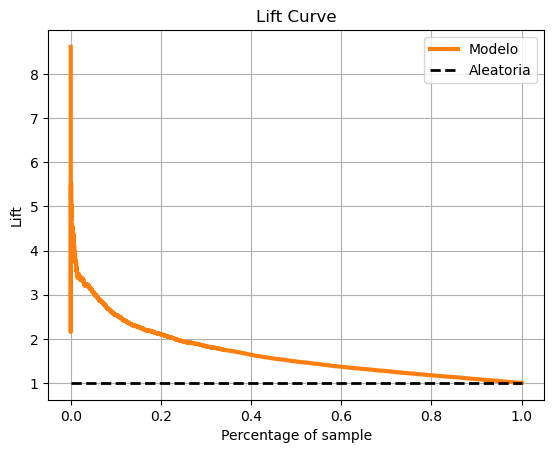

In [27]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);